In [80]:
import sys
import os
import importlib
import pandas as pd

sys.path.append('../shared')

if 'nlp_methods' in sys.modules:
    importlib.reload(sys.modules['nlp_methods'])

from nlp_methods import NLPMethods

## Task 1.2: Text Preprocessing
- Load and combine your text(s) into a single corpus
- Remove Project Gutenberg headers and footers from each text

In [81]:
nlp_methods = NLPMethods("https://www.gutenberg.org/cache/epub/2500/pg2500.txt")

clean_corpus = nlp_methods.remove_gutenberg_header()

## Task 1.3: Regex Pattern Analysis

### Dialogue extraction
- Count total dialogue instances
- Extract the longest piece of dialogue and count its length

### Chapters
- Find all chapter names in each book and store them in a data frame


In [82]:
# Print count of total dialogue instances
# Extract the longest piece of dialogue and count its length and print it
corpus_data = nlp_methods.get_processed_text(clean_corpus)

print("_" * 70)

chapters = nlp_methods.get_chapters(clean_corpus)
chapters_df = pd.DataFrame(chapters, columns=['Chapter'])
chapters_df = chapters_df.set_axis(range(1, len(chapters_df) + 1))
chapters_df

Number of quotes found: 372
Longest dialogue instance (2204 characters):
"Listen well, my dear, listen well! The sinner, which I am and which
you are, is a sinner, but in times to come he will be Brahma again, he
will reach the Nirvana, will be Buddha—and now see: these ‘times to
come’ are a deception, are only a parable! The sinner is not on his way
to become a Buddha, he is not in the process of developing, though our
capacity for thinking does not know how else to picture these things.
No, within the sinner is now and today already the future Buddha, his
future is already all there, you have to worship in him, in you, in
everyone the Buddha which is coming into being, the possible, the
hidden Buddha. The world, my friend Govinda, is not imperfect, or on a
slow path towards perfection: no, it is perfect in every moment, all
sin already carries the divine forgiveness in itself, all small
children already have the old person in themselves, all infants already
have death, all dying peop

,Chapter
1,THE SON OF THE BRAHMAN
2,WITH THE SAMANAS
3,GOTAMA
4,AWAKENING
5,KAMALA
6,WITH THE CHILDLIKE PEOPLE
7,SANSARA
8,BY THE RIVER
9,THE FERRYMAN
10,THE SON


## (Optional, if you want to take it further): Analyze dialogue vs. narrative ratio

/var/folders/02/c1hvrmj11kx0z457p84l6pbc0000gn/T/ipykernel_48175/1780572433.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_data, y='Content_Type', x='Percentage', orient='h',


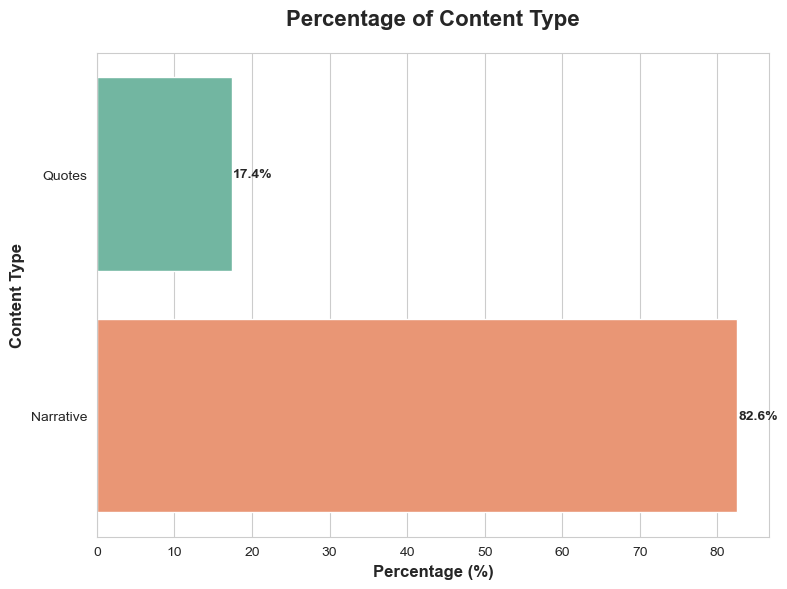

In [83]:
# Plot quotes vs narrative comparison using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract quote vs narrative data from corpus_data
quotes = len(corpus_data['quotes'])
non_quote_sentences = len(corpus_data['non_quote_sentences'])
quote_tokens = len(corpus_data['quote_tokens'])
non_quote_tokens = len(corpus_data['non_quote_tokens'])

# Calculate percentages
quote_percentage = (quotes / (quotes + non_quote_sentences)) * 100
narrative_percentage = (non_quote_sentences / (quotes + non_quote_sentences)) * 100

# Prepare data for seaborn
plot_data = pd.DataFrame({
    'Content_Type': ['Quotes', 'Narrative'],
    'Percentage': [quote_percentage, narrative_percentage]
})

# Create seaborn plot
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create horizontal bar plot with custom colors
ax = sns.barplot(data=plot_data, y='Content_Type', x='Percentage', orient='h', 
                 palette="Set2")

# Customize the plot
ax.set_title('Percentage of Content Type', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Content Type', fontsize=12, fontweight='bold')

# Add value labels on bars
for i, (bar, pct) in enumerate(zip(ax.patches, [quote_percentage, narrative_percentage])):
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
            f'{pct:.1f}%', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

**AI Citation:**
AI assistance: Claude (Anthropic) via Cursor IDE
Prompts: "Convert this to a seaborn plot.".

**Used for:**
- Converting matplotlib plot to seaborn plot

**Verification:** Verified graph matched printed stats

## Task 1.4: Statistical Sampling

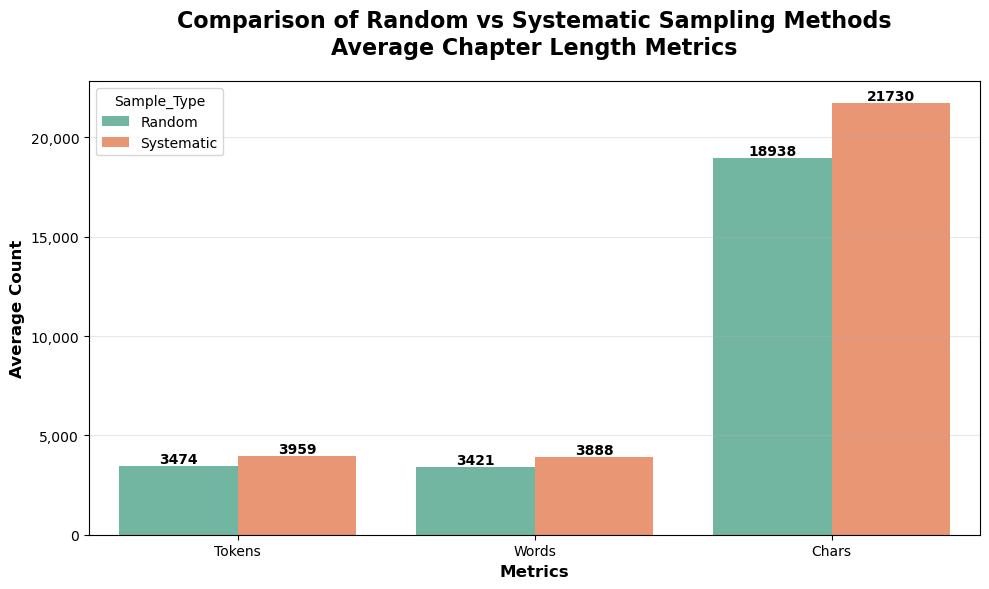

In [89]:
random_sample = nlp_methods.get_random_sample_chapter_data(chapters, clean_corpus)
systematic_sample = nlp_methods.get_systematic_sample_chapter_data(chapters, clean_corpus)
comparison_data = nlp_methods.compare_sample_lengths(random_sample, systematic_sample)

plot_data = []

metrics = ['tokens', 'words', 'chars']
for metric in metrics:
    avg_key = f'avg_{metric}'
    plot_data.append({
        'Metric': metric.title(),
        'Sample_Type': 'Random',
        'Average': comparison_data['random_sample'][avg_key]
    })
    plot_data.append({
        'Metric': metric.title(),
        'Sample_Type': 'Systematic', 
        'Average': comparison_data['systematic_sample'][avg_key]
    })

df_plot = pd.DataFrame(plot_data)

plt.style.use('default')
sns.set_palette("Set2")

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=df_plot, x='Metric', y='Average', hue='Sample_Type', ax=ax)

ax.set_title('Comparison of Random vs Systematic Sampling Methods\nAverage Chapter Length Metrics', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Count', fontsize=12, fontweight='bold')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=10, fontweight='bold')

ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [85]:
from ocr import OCR

ocr_processor = OCR()

# Process the PDF using our comprehensive OCR pipeline
print("Starting PDF processing for OCR_me_electricalengineering.pdf...")
print("Using PyMuPDF for text extraction and processing")
print("_" * 60)

# Process the PDF using the complete pipeline
results = ocr_processor.process_pdf_complete(
    pdf_path="./OCR_me_electricalengineering.pdf",
    output_dir="ocr_output"
)

processed_text = results['fixed_text']
original_text = results['original_text']

print("ORIGINAL EXTRACTED TEXT (first 500 characters):")
print("_" * 60)
print(original_text[:500])
print("...")

print("\nCLEANED AND PROCESSED TEXT (first 500 characters):")
print("_" * 60)
print(processed_text[:500])
print("...")

print(f"\OCR STATISTICS:")
print(f"   Original text length: {len(original_text):,} characters")
print(f"   Processed text length: {len(processed_text):,} characters")
print(f"   Difference: {len(processed_text) - len(original_text):+,} characters")

print(f"\nCLEANING EXAMPLES:")
print("   - Headers and footers removed")
print("   - Course codes standardized (e.g., 'CMPE 5220.' → 'CMPE 5220:')")
print("   - Credit formatting cleaned")
print("   - Faculty names fixed")
print("   - Excessive whitespace normalized")

Starting PDF processing for OCR_me_electricalengineering.pdf...
Using PyMuPDF for text extraction and processing
____________________________________________________________
Starting PDF processing for: ./OCR_me_electricalengineering.pdf
Using PyMuPDF for text extraction and processing

Step 1: Extracting text with PyMuPDF...
Opening PDF: ./OCR_me_electricalengineering.pdf
   Page 1: 5145 characters, 667 words
Successfully extracted 1 pages
PyMuPDF extraction successful!

Step 2: Analyzing document structure...
Font size distribution:
   Size 14.0: 1 elements
   Size 12.0: 5 elements
   Size 10.0: 103 elements
   Size 8.0: 1 elements

Likely headers (1 found):
   'ELECTRICAL ENGINEERING' (size: 14.0)

Fonts detected: 4
   ArnoPro-Bold
   ArnoPro-Regular
   MyriadPro-Regular
   MyriadPro-SemiboldSemiEx

Step 3: Cleaning and processing text...
Document detected as: academic
Applying academic document cleaning...
   Removed header: 'THE UNIVERSITY OF VERMONT'
   Removed header: 'ELECTRICA

**AI Citation:**
AI assistance: Claude (Anthropic) via Cursor IDE
Prompts: "I have been provided this 4_6_sampling_OCR Notebook, and I think it contains all functions needed to use OCR to process a document using PyMuPDF, remove headers and page numbers, footers, and footnotes, while preserving logical structure. I would like to create a new file in the shared folder called ocr.py and create a new class called ocr".

**Used for:**
- Creating a comprehensive OCR class in hw/shared/ocr.py with PyMuPDF-based PDF processing
- Integrating OCR processing into hw/week_4/hw3.ipynb with three new cells for PDF processing, text display, and validation analysis

**Verification:** Verified document processing worked as expected

